# Exploratory Data Analysis (Curiosity Team)

#### Using the Personal Key Indicators of Heart Disease dataset on Kaggle.com 
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

This notebook uses code provided by: 

The Erdös Institute May 2022 Bootcamp
https://github.com/TheErdosInstitute/code-2022
and

"Introduction to ML - Binary Logistic Regression Example for Beginners" 
https://github.com/pitsillides91/Python-Tutorials

### **Column Descriptions**
##### **HeartDisease:** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
##### **BMI:** Body Mass Index (BMI).
##### **Smoking:** Have you smoked at least 100 cigarettes in your entire life?
##### **AlcoholDrinking:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
##### **Stroke: **(Ever told) (you had) a stroke?
##### **PhysicalHealth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
##### **MentalHealth:** Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
##### **DiffWalking:** Do you have serious difficulty walking or climbing stairs?
##### **Sex:** Are you male or female?
##### **AgeCategory:** Fourteen-level age category. (then calculated the mean)
##### **Race:** Imputed race/ethnicity value.
##### **Diabetic:** (Ever told) (you had) diabetes?
##### **PhysicalActivity:** Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
##### **GenHealth:** Would you say that in general your health is...
##### **SleepTime:** On average, how many hours of sleep do you get in a 24-hour period?
##### **Asthma:** (Ever told) (you had) asthma?
##### **KidneyDisease:** Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
##### **SkinCancer:** (Ever told) (you had) skin cancer?

In [1]:
# import packages
import pandas as pd 
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# Load in data
hd       = pd.read_csv("../Data/heart_2020_cleaned.csv")
hd_train = pd.read_csv("../Data/data_train.csv")
hd_test  = pd.read_csv("../Data/data_test.csv")

# Print shape of data
print(hd.shape)

(319795, 18)


In [3]:
hd.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# Check for null values
hd.isnull().sum()


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
# Investigate all the elements whithin each Feature 

for column in hd:
    unique_values = np.unique(hd[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))


The number of values for feature HeartDisease is: 2 -- ['No' 'Yes']
The number of values for feature BMI is: 3604
The number of values for feature Smoking is: 2 -- ['No' 'Yes']
The number of values for feature AlcoholDrinking is: 2 -- ['No' 'Yes']
The number of values for feature Stroke is: 2 -- ['No' 'Yes']
The number of values for feature PhysicalHealth is: 31
The number of values for feature MentalHealth is: 31
The number of values for feature DiffWalking is: 2 -- ['No' 'Yes']
The number of values for feature Sex is: 2 -- ['Female' 'Male']
The number of values for feature AgeCategory is: 13
The number of values for feature Race is: 6 -- ['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
The number of values for feature Diabetic is: 4 -- ['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
The number of values for feature PhysicalActivity is: 2 -- ['No' 'Yes']
The number of values for feature GenHealth is: 5 -- ['Excellent' 'Fair' 'Good' 'Poor' 

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

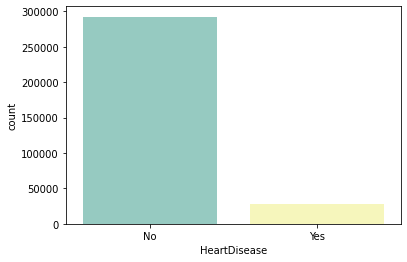

In [6]:
# Investigating the balance of Heart Disease and non Heart Disease
sns.countplot(x = 'HeartDisease', data = hd, palette = 'Set3')

In [7]:
print('\033[1m' + '# of Rows in Train Data:', len(hd_train))
print('HeartDisease Column Count in Train Data:' '\n', hd_train['HeartDisease'].value_counts())
print('\n')
print('# of Rows in Test Data:', len(hd_test))
print('HeartDisease Column Count in Test Data:' '\n', hd_test['HeartDisease'].value_counts())

# of Rows in Train Data: 255836
HeartDisease Column Count in Train Data:
 No     233982
Yes     21854
Name: HeartDisease, dtype: int64


# of Rows in Test Data: 63959
HeartDisease Column Count in Test Data:
 No     58440
Yes     5519
Name: HeartDisease, dtype: int64


In [8]:
# Checking descriptive statistics for numerical values
print(hd_train.describe())
print('\n')
print(hd_test.describe())

          Unnamed: 0            BMI  PhysicalHealth   MentalHealth  \
count  255836.000000  255836.000000   255836.000000  255836.000000   
mean   159781.150983      28.322066        3.371531       3.905197   
std     92258.112514       6.346842        7.953704       7.958074   
min         0.000000      12.020000        0.000000       0.000000   
25%     79881.750000      24.030000        0.000000       0.000000   
50%    159686.500000      27.340000        0.000000       0.000000   
75%    239508.250000      31.450000        2.000000       3.000000   
max    319794.000000      94.850000       30.000000      30.000000   

           SleepTime  
count  255836.000000  
mean        7.098004  
std         1.435068  
min         1.000000  
25%         6.000000  
50%         7.000000  
75%         8.000000  
max        24.000000  


          Unnamed: 0           BMI  PhysicalHealth  MentalHealth     SleepTime
count   63959.000000  63959.000000    63959.000000  63959.000000  63959.000000
me

In [9]:
# Checking whether there are any missing values
print(hd_train.info())
print('\n')
print(hd_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255836 entries, 0 to 255835
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        255836 non-null  int64  
 1   HeartDisease      255836 non-null  object 
 2   BMI               255836 non-null  float64
 3   Smoking           255836 non-null  object 
 4   AlcoholDrinking   255836 non-null  object 
 5   Stroke            255836 non-null  object 
 6   PhysicalHealth    255836 non-null  float64
 7   MentalHealth      255836 non-null  float64
 8   DiffWalking       255836 non-null  object 
 9   Sex               255836 non-null  object 
 10  AgeCategory       255836 non-null  object 
 11  Race              255836 non-null  object 
 12  Diabetic          255836 non-null  object 
 13  PhysicalActivity  255836 non-null  object 
 14  GenHealth         255836 non-null  object 
 15  SleepTime         255836 non-null  float64
 16  Asthma            25

In [10]:
hd_train.describe(include=[np.object])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,255836,255836,255836,255836,255836,255836,255836,255836,255836,255836,255836,255836,255836,255836
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,233982,150331,238399,246203,220239,134553,27289,196308,215742,198417,90902,221604,246455,231991


In [11]:
hd_train.columns

Index(['Unnamed: 0', 'HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking',
       'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

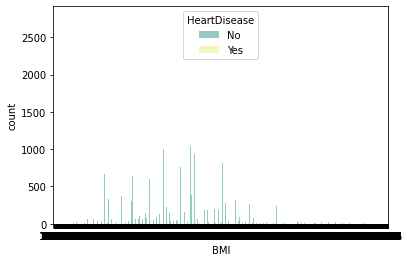

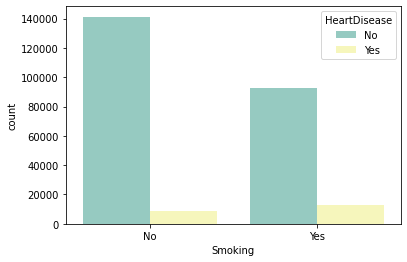

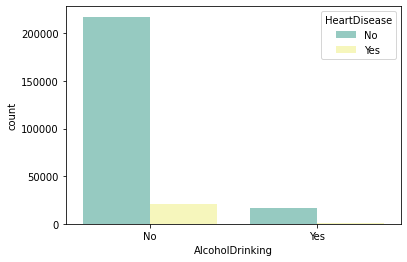

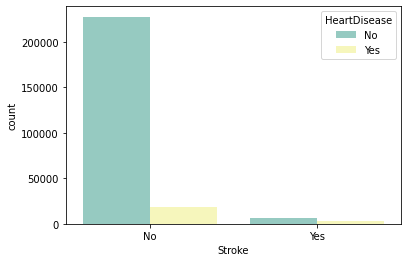

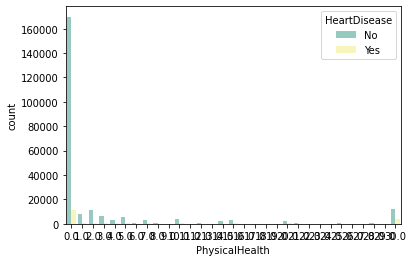

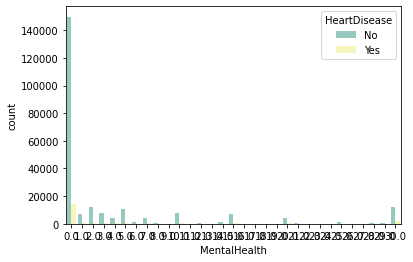

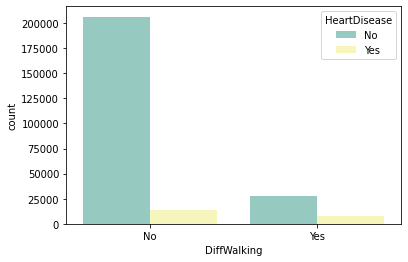

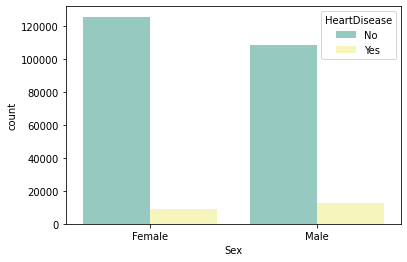

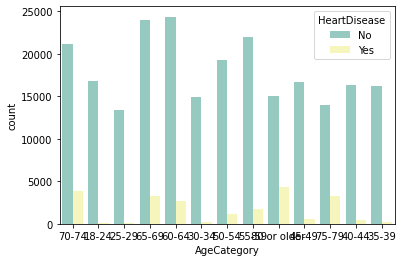

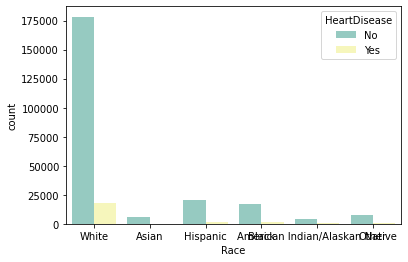

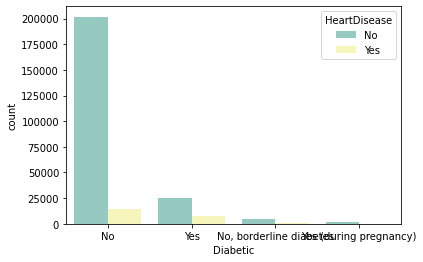

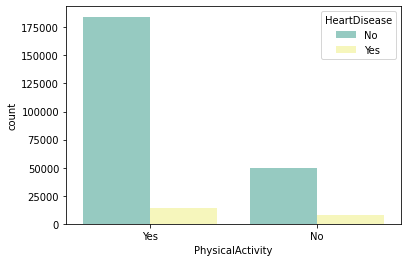

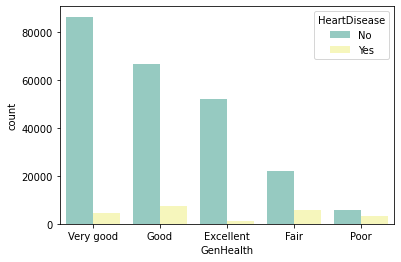

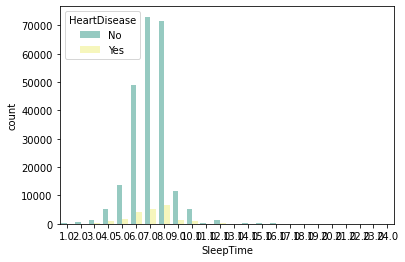

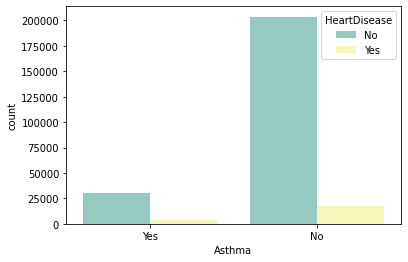

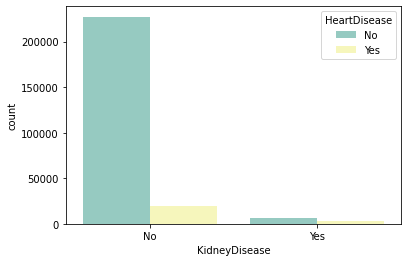

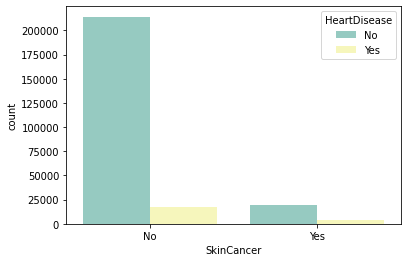

In [12]:
# Looping through all the features by our y variable - see if there is relationship
features = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']

for f in features:
    sns.countplot(x = f, data = hd_train, palette = 'Set3', hue = 'HeartDisease')
    plt.show()

<AxesSubplot:>

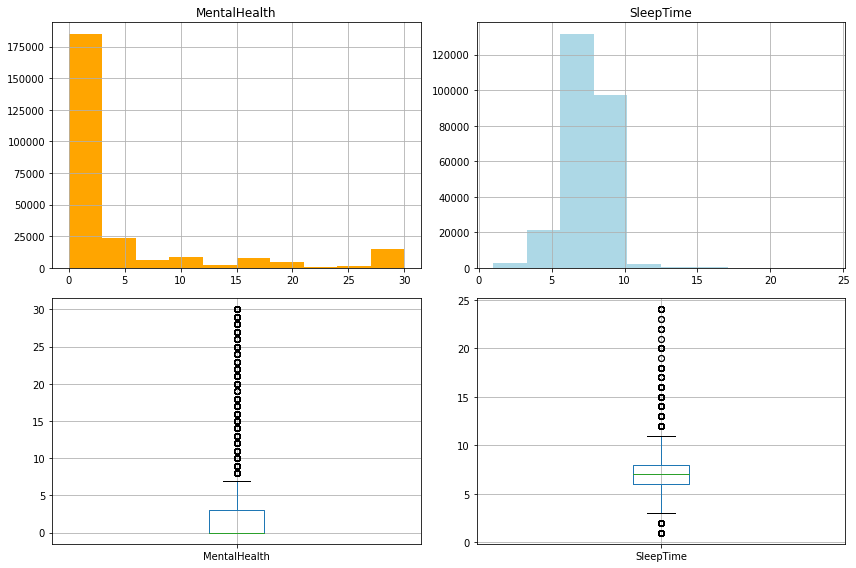

In [13]:
%matplotlib inline
fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)
hd_train.hist(column= ["MentalHealth"], ax=ax[0][0], color='orange')
hd_train.hist(column= ['SleepTime'], ax=ax[0][1], color='lightblue')
hd_train.boxplot(column= ["MentalHealth"], ax=ax[1][0])
hd_train.boxplot(column= ['SleepTime'], ax=ax[1][1])

In [14]:
numeric_var = hd_train[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

<Figure size 1152x576 with 0 Axes>

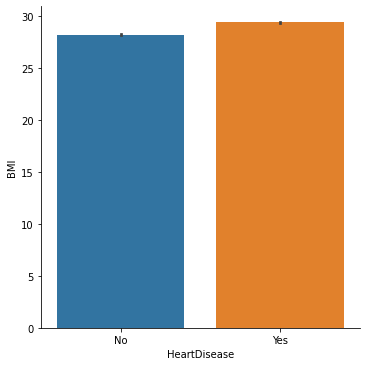

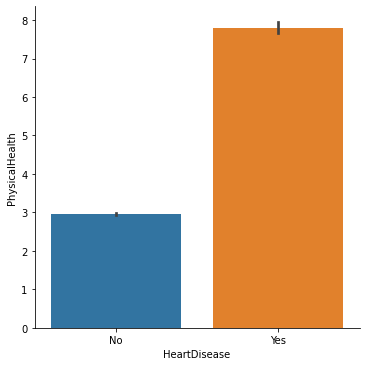

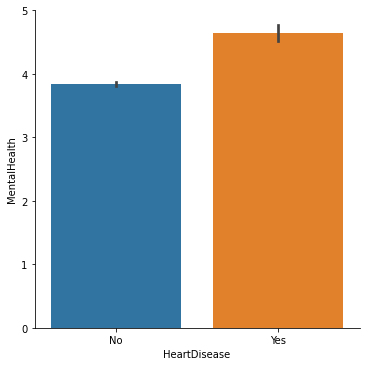

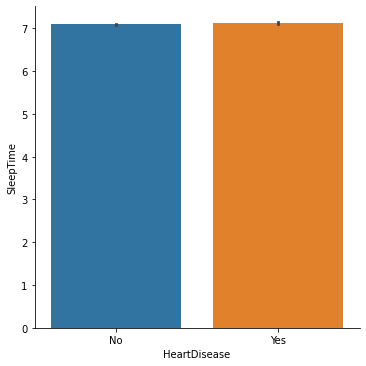

In [15]:
# Bivariate analysis 
%matplotlib inline
plt.figure(figsize = (16,8))
for i in numeric_var:
    sns.catplot(y = i ,x = 'HeartDisease',data = hd_train,kind = 'bar')

In [16]:
corr = numeric_var.corr()
corr.style.background_gradient(cmap='coolwarm')

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.106607,0.062323,-0.050500
PhysicalHealth,0.106607,1.000000,0.286219,-0.059884
MentalHealth,0.062323,0.286219,1.000000,-0.118223
SleepTime,-0.050500,-0.059884,-0.118223,1.000000


<AxesSubplot:xlabel='MentalHealth', ylabel='PhysicalHealth'>

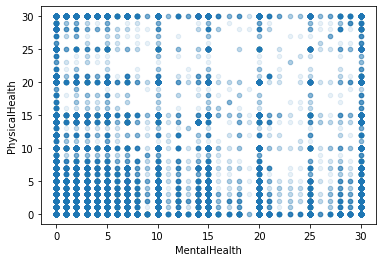

In [17]:
hd_train.plot(kind="scatter", x="MentalHealth", y="PhysicalHealth",
alpha=0.1)

In [18]:
# Crosstabulations for categorical variables 

print(pd.crosstab(hd_train['Smoking'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['AlcoholDrinking'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['Stroke'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['DiffWalking'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['Sex'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['AgeCategory'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['Race'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['Diabetic'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['PhysicalActivity'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['GenHealth'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['Asthma'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['KidneyDisease'], hd_train['HeartDisease'],margins=True))
print('\n')
print(pd.crosstab(hd_train['SkinCancer'], hd_train['HeartDisease'],margins=True))

HeartDisease      No    Yes     All
Smoking                            
No            141296   9035  150331
Yes            92686  12819  105505
All           233982  21854  255836


HeartDisease         No    Yes     All
AlcoholDrinking                       
No               217464  20935  238399
Yes               16518    919   17437
All              233982  21854  255836


HeartDisease      No    Yes     All
Stroke                             
No            227827  18376  246203
Yes             6155   3478    9633
All           233982  21854  255836


HeartDisease      No    Yes     All
DiffWalking                        
No            206390  13849  220239
Yes            27592   8005   35597
All           233982  21854  255836


HeartDisease      No    Yes     All
Sex                                
Female        125618   8935  134553
Male          108364  12919  121283
All           233982  21854  255836


HeartDisease      No    Yes     All
AgeCategory                        
18-